In [1]:
%matplotlib inline

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA, TruncatedSVD
from wordcloud import WordCloud

# Exam prep
## Live

In [3]:
reader = pd.read_csv("./data/SpotifyFeatures.csv", chunksize=10000)

In [4]:
all_genres = []
counts_by_genre = {}

for chunk in reader:
  genres_in_chunk = chunk.genre.unique()
  all_genres.extend(genres_in_chunk)

  for genre in genres_in_chunk:
    len_for_genre = len(chunk[chunk.genre == genre])
    if genre in counts_by_genre.keys():
      counts_by_genre[genre] += len_for_genre
    else:
      counts_by_genre[genre] = len_for_genre


In [5]:
set(all_genres)

{'A Capella',
 'Alternative',
 'Anime',
 'Blues',
 "Children's Music",
 'Children’s Music',
 'Classical',
 'Comedy',
 'Country',
 'Dance',
 'Electronic',
 'Folk',
 'Hip-Hop',
 'Indie',
 'Jazz',
 'Movie',
 'Opera',
 'Pop',
 'R&B',
 'Rap',
 'Reggae',
 'Reggaeton',
 'Rock',
 'Ska',
 'Soul',
 'Soundtrack',
 'World'}

In [6]:
counts_by_genre

{'Movie': 7806,
 'R&B': 8992,
 'A Capella': 119,
 'Alternative': 9263,
 'Country': 8664,
 'Dance': 8701,
 'Electronic': 9377,
 'Anime': 8936,
 'Folk': 9299,
 'Blues': 9023,
 'Opera': 8280,
 'Hip-Hop': 9295,
 "Children's Music": 5403,
 'Children’s Music': 9353,
 'Rap': 9232,
 'Indie': 9543,
 'Classical': 9256,
 'Pop': 9386,
 'Reggae': 8771,
 'Reggaeton': 8927,
 'Jazz': 9441,
 'Rock': 9272,
 'Ska': 8874,
 'Comedy': 9681,
 'Soul': 9089,
 'Soundtrack': 9646,
 'World': 9096}

In [7]:
pd.Series(counts_by_genre)

Movie               7806
R&B                 8992
A Capella            119
Alternative         9263
Country             8664
Dance               8701
Electronic          9377
Anime               8936
Folk                9299
Blues               9023
Opera               8280
Hip-Hop             9295
Children's Music    5403
Children’s Music    9353
Rap                 9232
Indie               9543
Classical           9256
Pop                 9386
Reggae              8771
Reggaeton           8927
Jazz                9441
Rock                9272
Ska                 8874
Comedy              9681
Soul                9089
Soundtrack          9646
World               9096
dtype: int64

In [8]:
pd.DataFrame({"genre": counts_by_genre.keys(), "count": counts_by_genre.values()})

,genre,count
0,Movie,7806
1,R&B,8992
2,A Capella,119
3,Alternative,9263
4,Country,8664
5,Dance,8701
6,Electronic,9377
7,Anime,8936
8,Folk,9299
9,Blues,9023


In [9]:
reader = pd.read_csv("./data/SpotifyFeatures.csv", chunksize=10000)

In [10]:
relevant_tracks = []
relevant_genres = ['Rock', 'Alternative', 'Pop', 'Jazz']

for chunk in reader:
  relevant_tracks.append(chunk[chunk.genre.isin(relevant_genres)])

relevant_tracks = pd.concat(relevant_tracks)


In [11]:
relevant_tracks

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
671,Alternative,Joji,Sanctuary,3xaugmCyXrVkrDTXbFkMW3,83,0.4220,0.552,180019,0.650,0.000275,C#,0.3720,-7.199,Major,0.1280,167.788,4/4,0.316
672,Alternative,Joji,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,81,0.5440,0.515,209274,0.479,0.005980,D#,0.1910,-7.458,Major,0.0261,88.964,4/4,0.284
673,Alternative,Joji,YEAH RIGHT,1VGzxJnVQND7Cg5H5wGj14,76,0.6190,0.672,174358,0.588,0.241000,C#,0.0992,-9.573,Major,0.1330,169.033,4/4,0.204
674,Alternative,Oliver Tree,Alien Boy,1gGhqfs2pDTOI30AEXMXrn,73,0.1110,0.803,163525,0.599,0.000000,C#,0.2360,-5.169,Major,0.0985,130.107,4/4,0.484
675,Alternative,Joji,CAN'T GET OVER YOU (feat. Clams Casino),39oeKRgsLeynDIbWuXyA47,74,0.6840,0.900,107077,0.316,0.077100,A,0.0853,-8.797,Major,0.3320,129.914,4/4,0.844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226503,Rock,The Beatles,No Reply - Remastered 2009,4ltC6PrqkTtpcRNi5lvS4z,58,0.6700,0.718,136067,0.593,0.000000,C,0.1720,-9.976,Major,0.0377,124.251,4/4,0.869
226504,Rock,QUEEN BEE,Fire,3xVCQGla5LLhrwqNS2FcHo,60,0.0340,0.521,215973,0.933,0.000021,B,0.3300,-4.874,Minor,0.1790,169.842,4/4,0.607
226505,Rock,Freedom Fry,Awake,47ed9eO66cBHvWteLlF7C0,59,0.6710,0.618,194000,0.769,0.241000,B,0.2760,-4.642,Minor,0.0309,111.978,4/4,0.607
226506,Rock,Beck,Girl,3DgNj1aYbSRVoVO8yX7DRt,51,0.0543,0.681,209893,0.662,0.005120,G#,0.2060,-6.526,Major,0.1150,149.485,4/4,0.850


In [12]:
relevant_tracks.shape

(37362, 18)

In [13]:
relevant_tracks.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [14]:
popularity_counts = relevant_tracks.popularity.value_counts()

Text(0, 0.5, 'Count')

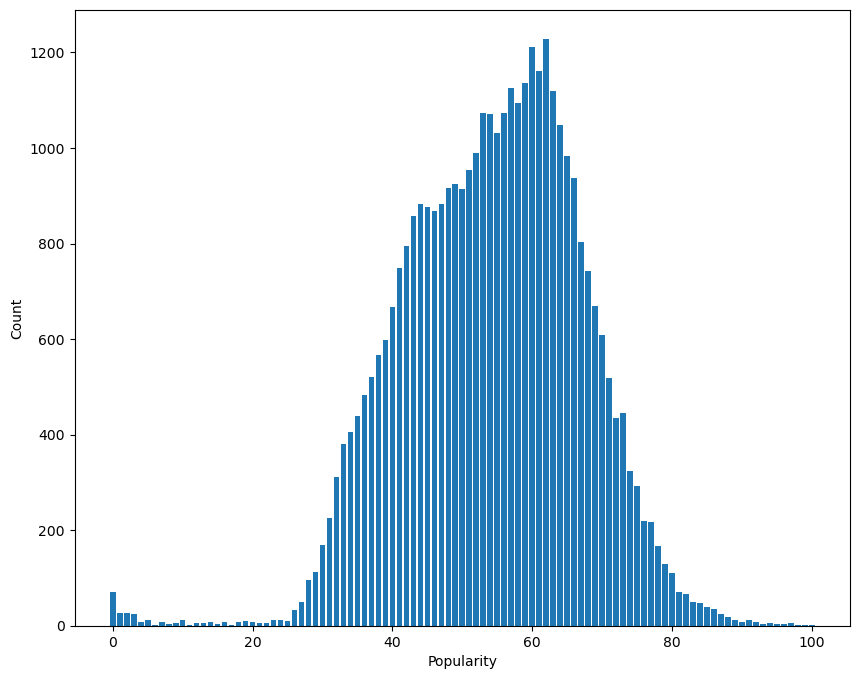

In [15]:
plt.figure(figsize=(10, 8))
plt.bar(popularity_counts.index, popularity_counts)
plt.xlabel('Popularity')
plt.ylabel('Count')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


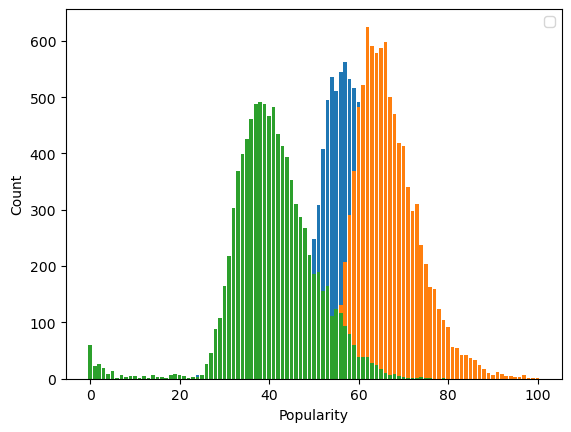

In [16]:
rock_counts = relevant_tracks[relevant_tracks.genre == 'Rock'].popularity.value_counts()

plt.bar(rock_counts.index, rock_counts)

pop_counts = relevant_tracks[relevant_tracks.genre == 'Pop'].popularity.value_counts()

plt.bar(pop_counts.index, pop_counts)
jazz_counts = relevant_tracks[relevant_tracks.genre == 'Jazz'].popularity.value_counts()

plt.bar(jazz_counts.index, jazz_counts)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.legend()
plt.show()

In [17]:
popularities = relevant_tracks.groupby('genre').popularity.value_counts()

In [18]:
popularities.name = "count"

In [19]:
popularities.reset_index()

,genre,popularity,count
0,Alternative,49,574
1,Alternative,48,563
2,Alternative,46,546
3,Alternative,47,542
4,Alternative,45,522
...,...,...,...
288,Rock,86,1
289,Rock,87,1
290,Rock,88,1
291,Rock,90,1


In [20]:
# group by 2 columns instead - more useful when we want to get counts (or smth along those lines) for a different column
relevant_tracks.groupby(['genre', 'popularity']).artist_name.value_counts()

genre        popularity  artist_name        
Alternative  0           Bebe                   1
                         Bunbury                1
                         Grizfolk               1
                         Jarabe De Palo         1
                         Jorge Drexler          1
                                               ..
Rock         87          YUNGBLUD               1
             88          Imagine Dragons        1
             89          Imagine Dragons        2
             90          Imagine Dragons        1
             95          Panic! At The Disco    1
Name: artist_name, Length: 27172, dtype: int64

In [21]:
popularities = popularities.reset_index()

In [22]:
popularities

,genre,popularity,count
0,Alternative,49,574
1,Alternative,48,563
2,Alternative,46,546
3,Alternative,47,542
4,Alternative,45,522
...,...,...,...
288,Rock,86,1
289,Rock,87,1
290,Rock,88,1
291,Rock,90,1


Text(0, 0.5, 'Count')

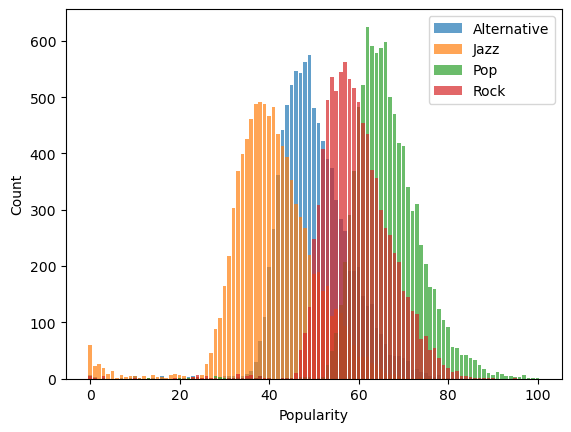

In [23]:
for genre_name, group_data in popularities.groupby('genre'):
  plt.bar(group_data.popularity, group_data['count'], label = genre_name, alpha = 0.7)

plt.legend()
plt.xlabel('Popularity')
plt.ylabel('Count')
    

In [24]:
relevant_tracks[relevant_tracks.genre == 'Jazz'].sort_values('popularity', ascending=False )

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
145430,Jazz,"Earth, Wind & Fire",September,5nNmj1cLH3r4aA4XDJ2bgY,79,0.114,0.697,214827,0.8090,0.000521,A,0.1830,-8.197,Major,0.0302,125.941,4/4,0.9800
145461,Jazz,Aretha Franklin,I Say a Little Prayer,3NfxSdJnVdon1axzloJgba,76,0.480,0.590,216773,0.3550,0.000000,A,0.0585,-14.051,Major,0.0352,133.030,4/4,0.4990
145441,Jazz,Norah Jones,Don't Know Why,6ybViy2qrO9sIi41EgRJgx,75,0.883,0.732,186147,0.1980,0.000011,F,0.0659,-11.775,Major,0.0280,88.174,4/4,0.6180
145429,Jazz,Kelsea Ballerini,Miss Me More,5NfJGBAL9mgFPRQxKJmiX2,74,0.014,0.643,192840,0.7200,0.000000,D,0.0834,-7.146,Major,0.0527,96.028,4/4,0.4910
145440,Jazz,Nina Simone,Feeling Good,1VKsbTJ78G5bnfyoPz46LA,74,0.854,0.318,174000,0.3340,0.000000,G,0.1880,-9.267,Minor,0.0487,78.508,4/4,0.5410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176055,Jazz,Randy Crawford,Diamante,1C3GhtjP2dOjb6sFWfnpPq,0,0.262,0.638,281000,0.4160,0.000010,F,0.3390,-12.187,Major,0.0266,110.979,4/4,0.5200
178671,Jazz,Joe Sample,First Love,4vGtkFQQfIx92P2MwFUwl0,0,0.949,0.386,281173,0.0651,0.276000,A#,0.0961,-16.483,Major,0.0463,177.939,3/4,0.1830
177037,Jazz,KLIM,Uh,1UJq6iyLblRa227fIa1Md5,0,0.041,0.308,142000,0.5520,0.692000,C#,0.3260,-9.202,Major,0.4160,83.477,4/4,0.6760
179683,Jazz,David Sanborn,One Hundred Ways,3uUVrSZWHyts4YZfMUbofW,0,0.289,0.667,246440,0.3940,0.137000,G#,0.1680,-14.672,Major,0.0291,93.133,4/4,0.7310


(array([3.6714e+04, 6.2400e+02, 2.0000e+01, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  19693. ,  467523.1,  915353.2, 1363183.3, 1811013.4, 2258843.5,
        2706673.6, 3154503.7, 3602333.8, 4050163.9, 4497994. ]),
 <BarContainer object of 10 artists>)

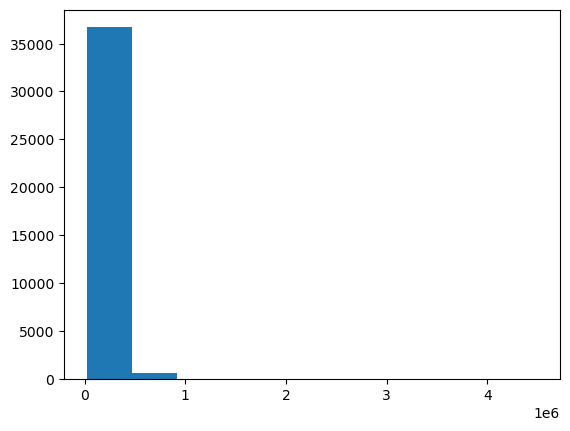

In [25]:
plt.hist(relevant_tracks.duration_ms)

In [26]:
relevant_tracks.nlargest(10, 'duration_ms')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
181515,Jazz,Bonobo,Late Night Tales: Bonobo,3TjdCL5eVn1dujySzeGqBG,37,0.528000,0.408,4497994,0.436,0.09950,E,0.1980,-11.497,Minor,0.1640,76.868,4/4,0.0778
148739,Jazz,Miles Davis,Bitches Brew,4IqzVeWfWLPQ2deCYYWeXL,40,0.534000,0.400,1618693,0.512,0.27600,A#,0.1040,-9.094,Minor,0.0348,99.180,4/4,0.1700
177093,Jazz,Keith Jarrett,"Köln, January 24, 1975, Pt. I - Live",0T4KV1pj8as2xvdHZAP5ae,44,0.979000,0.343,1561600,0.252,0.84000,D,0.7140,-16.201,Major,0.0517,115.299,4/4,0.0827
225327,Rock,Pink Floyd,Echoes,7kriFJLY2KOhw5en9iI2jb,57,0.366000,0.285,1412451,0.322,0.65100,F#,0.1070,-16.580,Minor,0.0440,134.042,4/4,0.1420
6304,Alternative,Dave Grohl,Play,3ATAV8kiC5wg7U0eSMHlQp,49,0.000308,0.197,1355938,0.837,0.75200,A,0.1020,-8.958,Major,0.0626,186.443,4/4,0.1360
177382,Jazz,Godspeed You! Black Emperor,Storm,1HfJV18PHF2UQqh4TuySBJ,45,0.210000,0.102,1352413,0.614,0.71400,D#,0.0996,-9.433,Major,0.0649,182.349,3/4,0.0379
181351,Jazz,"Emerson, Lake & Palmer","Tarkus - i. Eruption, ii. Stones of Years, iii...",62d0aGpYF2p8fpvJ1qa32V,42,0.033100,0.462,1237960,0.545,0.07190,F,0.1260,-12.217,Major,0.0486,110.828,4/4,0.4940
154143,Rock,Rush,2112: Overture / The Temples Of Syrinx / Disco...,5H8xFHau0x3PI1CssO6EaX,53,0.078700,0.345,1233667,0.795,0.00165,D,0.1800,-7.440,Major,0.1080,134.141,4/4,0.1890
147963,Jazz,Miles Davis,Pharaoh's Dance,3CctogqiXpI4BTBnDOq03Y,42,0.487000,0.437,1204853,0.516,0.42600,C,0.1760,-10.290,Major,0.0402,85.058,4/4,0.3240
176562,Jazz,Miles Davis,In a Silent Way - LP Mix,54a3lHJAwce1dOKrsDPEHv,38,0.945000,0.426,1192333,0.276,0.87100,G#,0.1080,-15.045,Minor,0.0357,132.244,4/4,0.0493


In [27]:
MS_IN_MINUTE = 1000 * 60
duration_mins = relevant_tracks.duration_ms / MS_IN_MINUTE
durations_hist = pd.qcut(duration_mins, 10).value_counts()
durations_hist.sort_index()


(0.327, 2.793]     3737
(2.793, 3.123]     3736
(3.123, 3.349]     3736
(3.349, 3.558]     3737
(3.558, 3.759]     3738
(3.759, 3.988]     3733
(3.988, 4.272]     3739
(4.272, 4.669]     3733
(4.669, 5.387]     3736
(5.387, 74.967]    3737
Name: duration_ms, dtype: int64

In [28]:
relevant_tracks.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

### Analysis of key and time signatures

In [29]:
relevant_tracks.key.unique()

array(['C#', 'D#', 'A', 'B', 'C', 'F#', 'E', 'A#', 'G', 'F', 'G#', 'D'],
      dtype=object)

In [30]:
relevant_tracks.key.value_counts()

C     4431
G     4079
D     3781
C#    3739
A     3466
F     3421
B     2936
E     2770
G#    2544
F#    2519
A#    2504
D#    1172
Name: key, dtype: int64

In [31]:
relevant_tracks.groupby('genre').key.value_counts()

genre        key
Alternative  C      1045
             G      1024
             D       981
             C#      972
             A       865
             B       844
             F#      727
             E       705
             F       703
             G#      622
             A#      510
             D#      265
Jazz         F      1190
             C      1136
             G      1079
             A#      881
             C#      846
             D       793
             A       782
             G#      688
             E       597
             B       579
             F#      507
             D#      363
Pop          C#     1205
             C      1067
             G       887
             D       850
             F       831
             B       802
             G#      747
             A       738
             F#      699
             A#      658
             E       610
             D#      292
Rock         C      1183
             D      1157
             G      1089
        

In [32]:
relevant_tracks['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [33]:
mode_counts = relevant_tracks.groupby("genre")['mode'].value_counts()

In [34]:
mode_counts

genre        mode 
Alternative  Major    5877
             Minor    3386
Jazz         Major    5031
             Minor    4410
Pop          Major    5843
             Minor    3543
Rock         Major    6878
             Minor    2394
Name: mode, dtype: int64

In [35]:
mode_counts.name = 'count'

In [36]:
mode_counts = mode_counts.reset_index()

In [37]:
pd.pivot_table(index= mode_counts.genre, columns=mode_counts['mode'], data=mode_counts)

count      
mode        Major Minor
genre                  
Alternative  5877  3386
Jazz         5031  4410
Pop          5843  3543
Rock         6878  2394

In [38]:
relevant_tracks.groupby(["key", "mode"]).size()

key  mode 
A    Major    2085
     Minor    1381
A#   Major    1192
     Minor    1312
B    Major    1299
     Minor    1637
C    Major    3461
     Minor     970
C#   Major    2520
     Minor    1219
D    Major    2867
     Minor     914
D#   Major     753
     Minor     419
E    Major    1316
     Minor    1454
F    Major    1767
     Minor    1654
F#   Major    1370
     Minor    1149
G    Major    3041
     Minor    1038
G#   Major    1958
     Minor     586
dtype: int64

In [39]:
key_signatures = relevant_tracks.groupby(["genre","key", "mode"]).size().reset_index()
key_signatures = key_signatures.rename(columns= {0: 'count'})

In [40]:
key_signatures['key_sig'] = key_signatures.key + ' ' + key_signatures['mode'].str.lower()

In [41]:
key_signatures = key_signatures.drop(columns=['key', 'mode'])

In [42]:
key_signatures

,genre,count,key_sig
0,Alternative,538,A major
1,Alternative,327,A minor
2,Alternative,213,A# major
3,Alternative,297,A# minor
4,Alternative,371,B major
...,...,...,...
91,Rock,236,F# minor
92,Rock,921,G major
93,Rock,168,G minor
94,Rock,394,G# major


In [43]:
for genre_name, group_data in key_signatures.groupby('genre'):
  print(group_data.nlargest(5, 'count'))
  print()

          genre  count   key_sig
6   Alternative    854   C major
20  Alternative    799   G major
10  Alternative    733   D major
8   Alternative    658  C# major
0   Alternative    538   A major

   genre  count   key_sig
30  Jazz    759   C major
41  Jazz    695   F minor
44  Jazz    675   G major
32  Jazz    609  C# major
46  Jazz    541  G# major

   genre  count   key_sig
54   Pop    805   C major
56   Pop    777  C# major
58   Pop    689   D major
68   Pop    646   G major
70   Pop    559  G# major

   genre  count  key_sig
78  Rock   1043  C major
82  Rock    996  D major
92  Rock    921  G major
72  Rock    807  A major
86  Rock    524  E major



In [44]:
relevant_tracks.time_signature.value_counts()

4/4    34349
3/4     2413
5/4      416
1/4      183
0/4        1
Name: time_signature, dtype: int64

In [45]:
relevant_tracks[relevant_tracks.time_signature == '0/4']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
111059,Pop,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,61,0.184,0.619,257560,0.539,0.0,C,0.288,-6.9,Major,0.387,145.618,0/4,0.424


In [46]:
tracks_in_54 = relevant_tracks[relevant_tracks.time_signature == '5/4']

tracks_in_54.genre.value_counts() / len(tracks_in_54)

Jazz           0.346154
Pop            0.317308
Alternative    0.225962
Rock           0.110577
Name: genre, dtype: float64

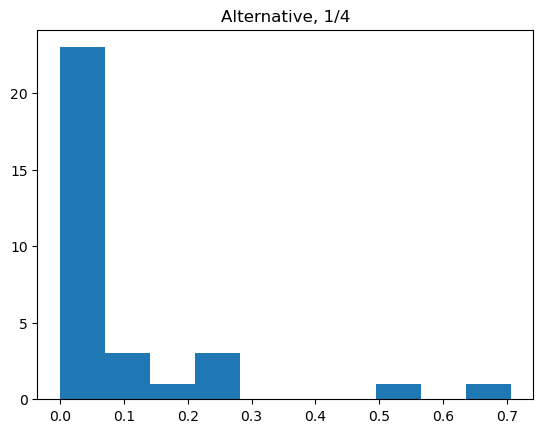

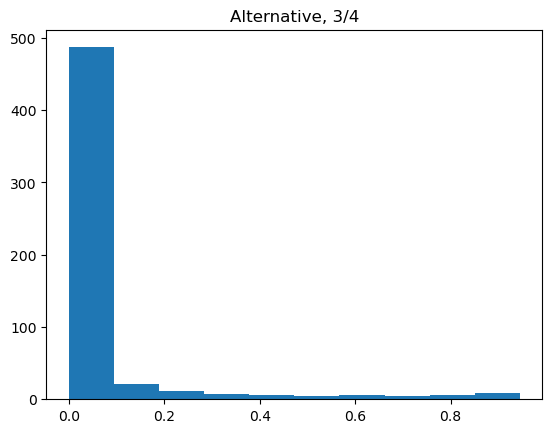

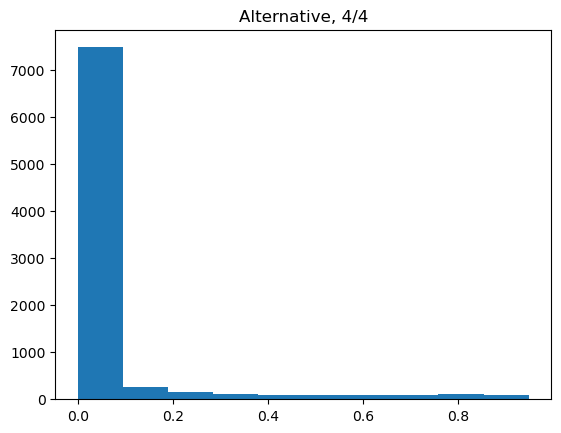

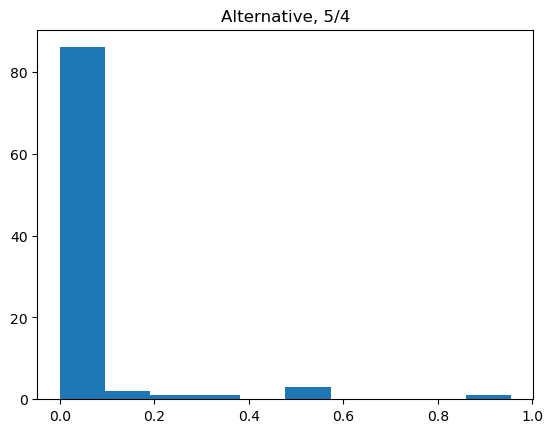

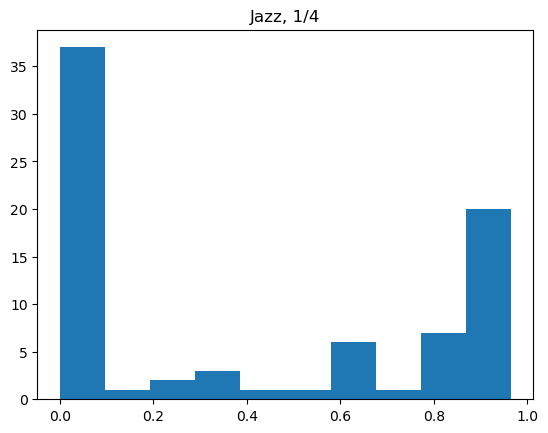

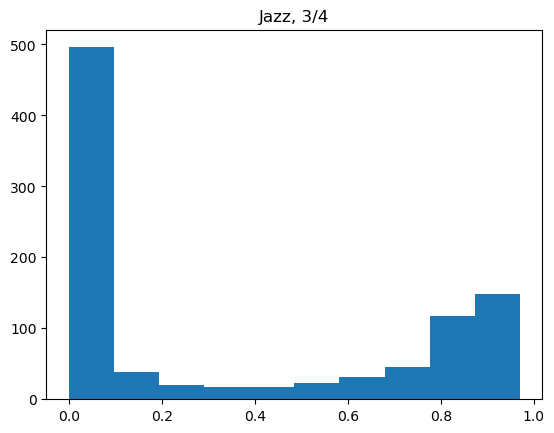

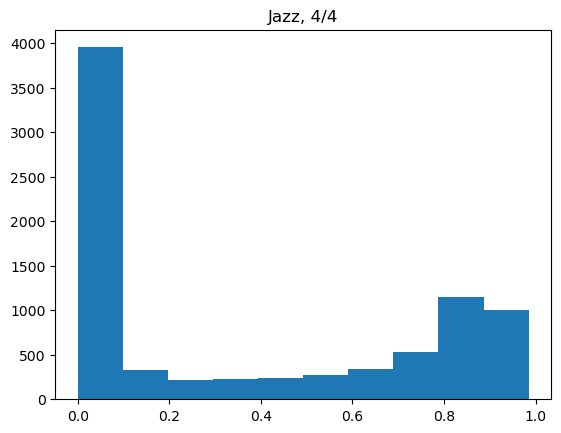

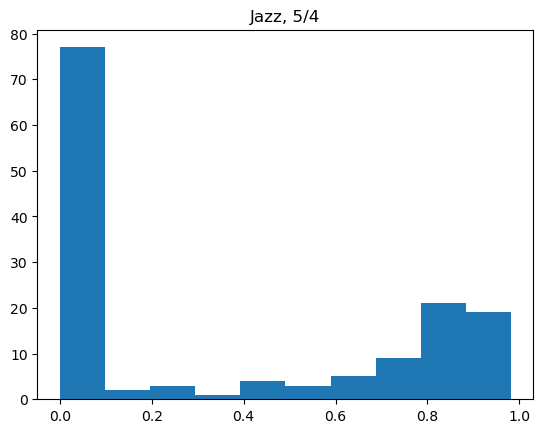

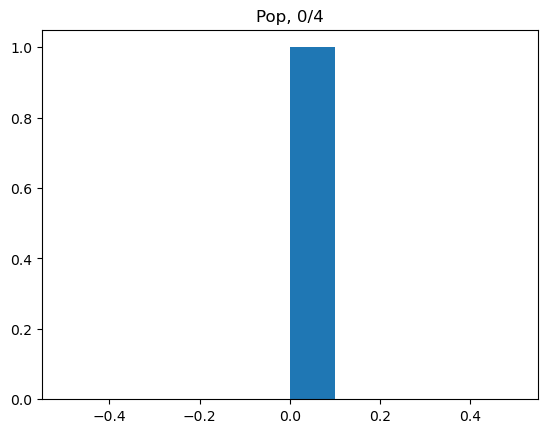

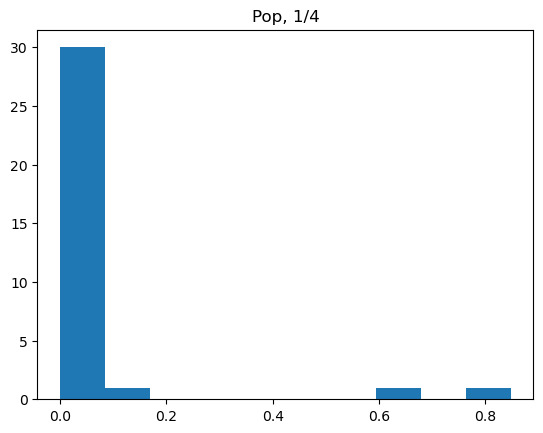

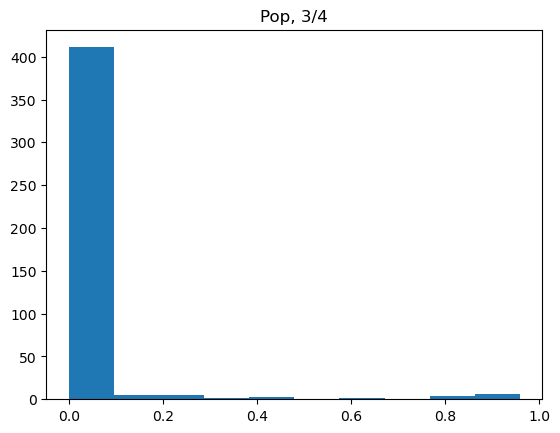

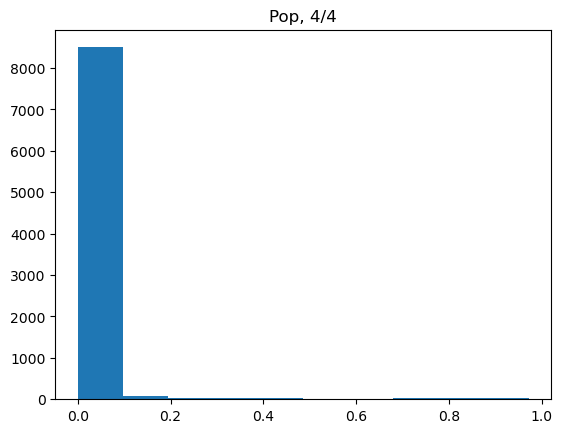

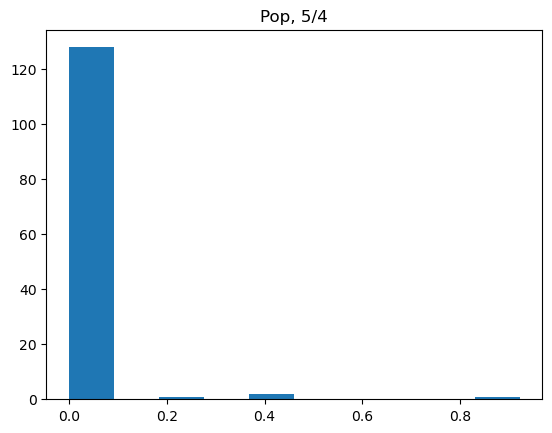

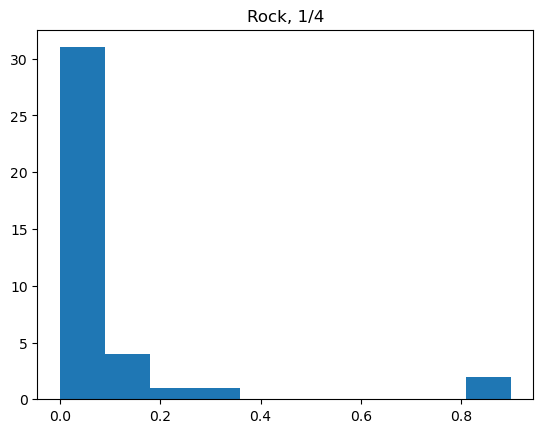

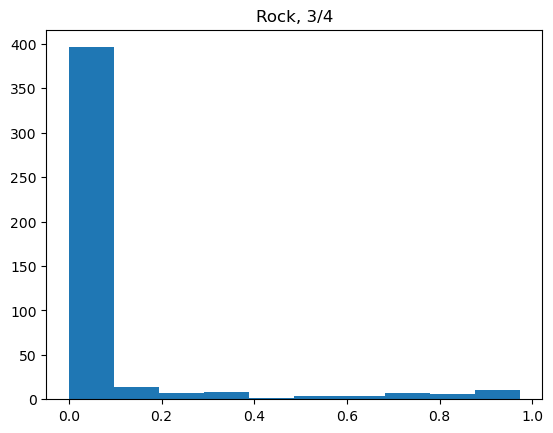

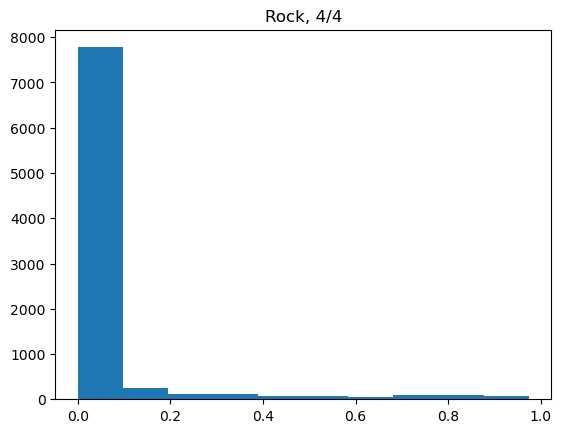

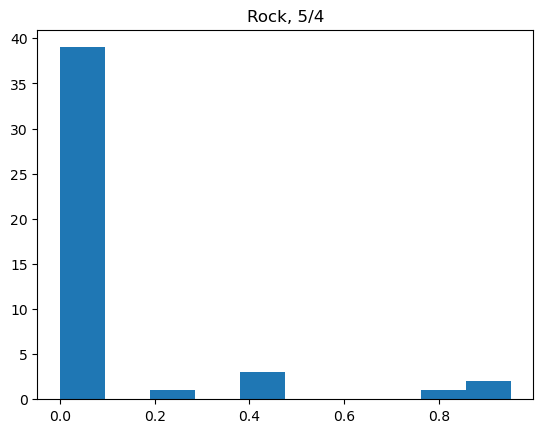

In [47]:
for (genre, time_sig), group_data in relevant_tracks.groupby(['genre', 'time_signature']):
  plt.title(f"{genre}, {time_sig}")
  plt.hist(group_data.instrumentalness)
  plt.show()

(array([3.6714e+04, 6.2400e+02, 2.0000e+01, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  19693. ,  467523.1,  915353.2, 1363183.3, 1811013.4, 2258843.5,
        2706673.6, 3154503.7, 3602333.8, 4050163.9, 4497994. ]),
 <BarContainer object of 10 artists>)

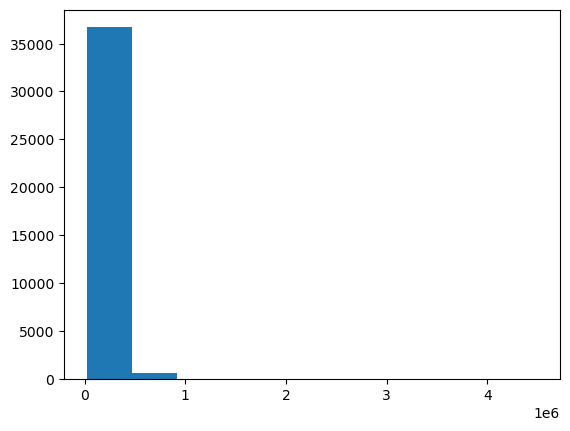

In [48]:
plt.hist(relevant_tracks.duration_ms)


[]

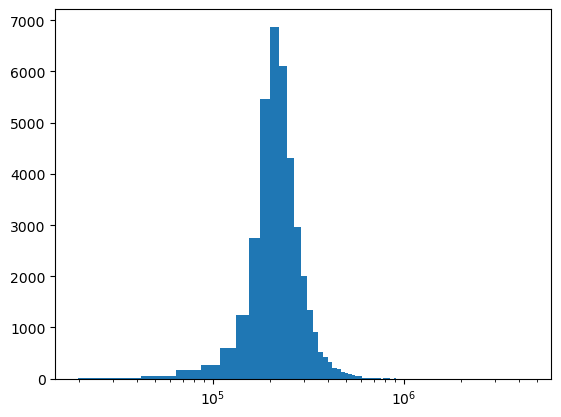

In [49]:
plt.hist(relevant_tracks.duration_ms, bins = 200)
plt.semilogx()

In [50]:
relevant_tracks.duration_ms.min(), relevant_tracks.duration_ms.max()

(19693, 4497994)

In [51]:
relevant_tracks.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.222476,0.117213,-0.145600,0.176188,-0.389832,-0.017560,0.304451,0.054788,0.076736,0.001525
acousticness,-0.222476,1.000000,-0.056832,0.024124,-0.727397,0.219275,-0.081983,-0.634819,-0.067962,-0.160563,-0.139599
danceability,0.117213,-0.056832,1.000000,-0.169166,-0.026021,-0.023901,-0.086735,0.075814,0.184791,-0.172253,0.405957
duration_ms,-0.145600,0.024124,-0.169166,1.000000,-0.041876,0.150115,0.028421,-0.145920,-0.118288,-0.009693,-0.139378
energy,0.176188,-0.727397,-0.026021,-0.041876,1.000000,-0.225708,0.154888,0.791255,0.082235,0.198927,0.292609
instrumentalness,-0.389832,0.219275,-0.023901,0.150115,-0.225708,1.000000,-0.051450,-0.374827,-0.103345,-0.085346,-0.053148
liveness,-0.017560,-0.081983,-0.086735,0.028421,0.154888,-0.051450,1.000000,0.088159,0.097100,0.025245,0.030018
loudness,0.304451,-0.634819,0.075814,-0.145920,0.791255,-0.374827,0.088159,1.000000,0.088122,0.162524,0.179427
speechiness,0.054788,-0.067962,0.184791,-0.118288,0.082235,-0.103345,0.097100,0.088122,1.000000,0.056712,0.050045
tempo,0.076736,-0.160563,-0.172253,-0.009693,0.198927,-0.085346,0.025245,0.162524,0.056712,1.000000,0.032380


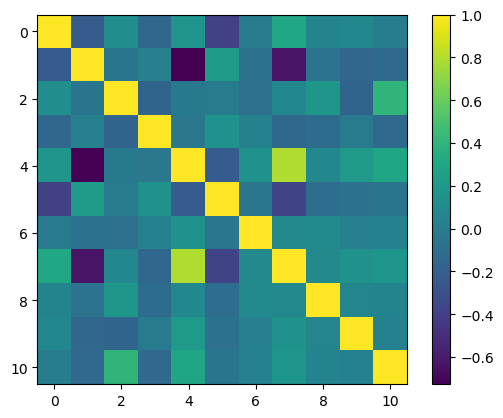

In [52]:
plt.imshow(relevant_tracks.corr())
plt.colorbar()

<AxesSubplot:>

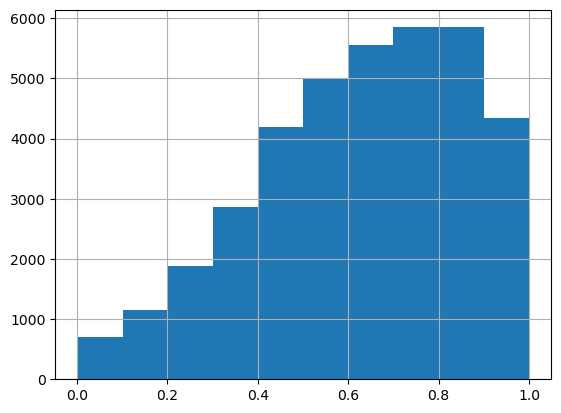

In [53]:
relevant_tracks.energy.hist()

<AxesSubplot:>

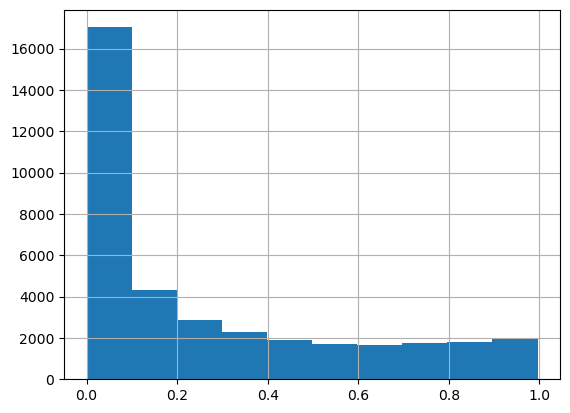

In [54]:
relevant_tracks.acousticness.hist()

Text(0, 0.5, 'Loudness')

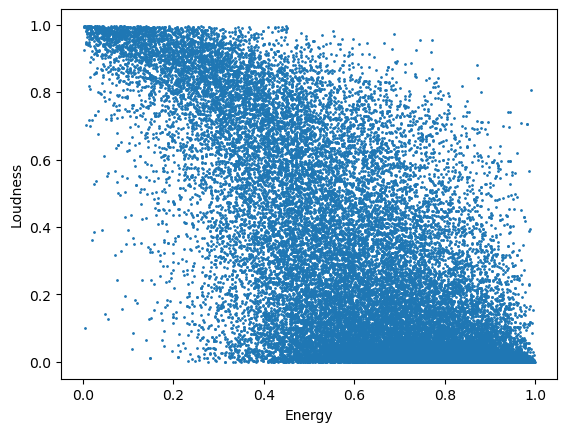

In [55]:
plt.scatter(relevant_tracks.energy, relevant_tracks.acousticness, s =1)
plt.xlabel("Energy")
plt.ylabel("Loudness")

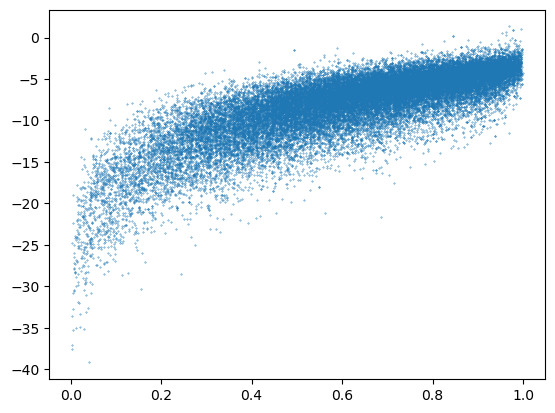

In [56]:
# energy and loudness have different scales, so it doesn't make sense to do this
# it is very misleading
# loudness is in decibels and they are exponential!!!!
# most points are in the top-right
plt.scatter(relevant_tracks.energy, relevant_tracks.loudness, s = .1)

In [57]:
# despite the above, this correlation seems to be very strong, because most data is top-right and looks linear
np.corrcoef(relevant_tracks.energy, relevant_tracks.loudness)

array([[1.        , 0.79125511],
       [0.79125511, 1.        ]])

Text(0, 0.5, 'Acousticness')

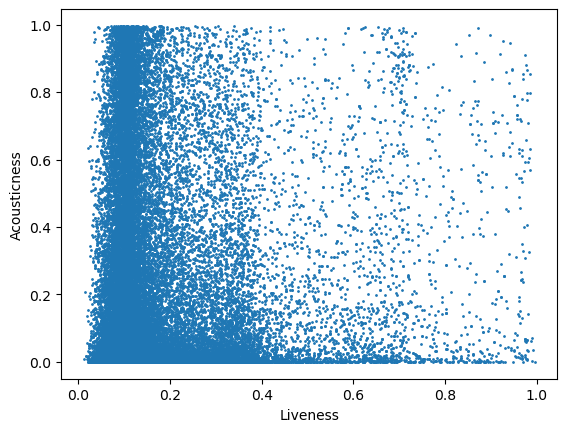

In [58]:
# no correlation
# shape is like this because liveness has a similar distribution (below cell)
plt.scatter(relevant_tracks.liveness, relevant_tracks.acousticness, s =1)
plt.xlabel("Liveness")
plt.ylabel("Acousticness")

(array([14855., 12272.,  4221.,  3414.,   820.,   543.,   589.,   313.,
          175.,   160.]),
 array([0.012 , 0.1104, 0.2088, 0.3072, 0.4056, 0.504 , 0.6024, 0.7008,
        0.7992, 0.8976, 0.996 ]),
 <BarContainer object of 10 artists>)

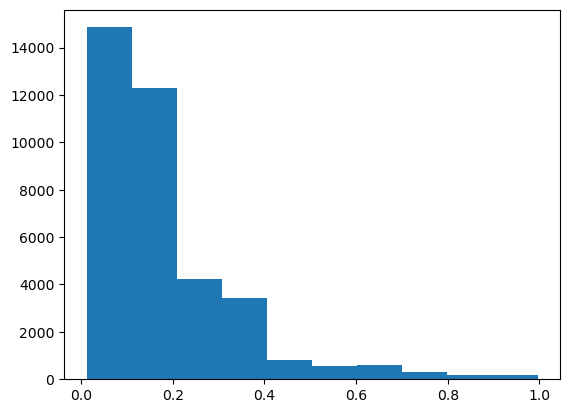

In [59]:
plt.hist(relevant_tracks.liveness)

(array([17031.,  4310.,  2865.,  2303.,  1915.,  1720.,  1682.,  1779.,
         1806.,  1951.]),
 array([1.000000e-06, 9.960090e-02, 1.992008e-01, 2.988007e-01,
        3.984006e-01, 4.980005e-01, 5.976004e-01, 6.972003e-01,
        7.968002e-01, 8.964001e-01, 9.960000e-01]),
 <BarContainer object of 10 artists>)

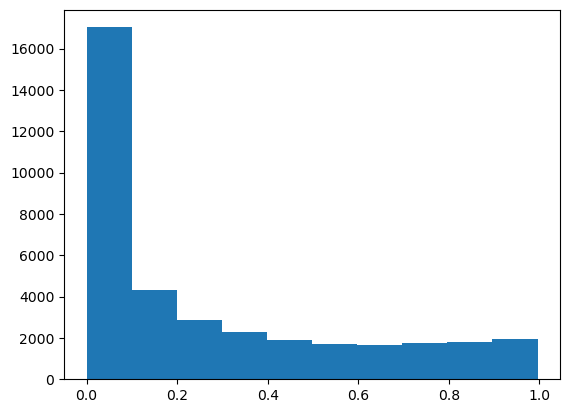

In [60]:
plt.hist(relevant_tracks.acousticness)

In [61]:
lyrics = pd.read_csv("./data/metal_lyrics.csv")

In [62]:
lyrics

,Artist,Album,Song,Lyric,SongNum,Year
0,...AAAARRGHH,aaaarrghh,_Gecenin_G__lgesi,Kara bulutlar sardГ„В± yine dГѓВјnyamГ„В±\nKГ„...,1,0
1,...AAAARRGHH,aaaarrghh,_Son___afak,Dolunay parlak gГѓВ¶rГѓВјnmГѓВјyor bu gece\nBe...,2,0
2,...AAAARRGHH,aaaarrghh,_F__rt__na_Yakla__yyor...,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,3,0
3,...AAAARRGHH,aaaarrghh,_Ebedi_Buzulun_Ortas__nda,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,4,0
4,...AAAARRGHH,aaaarrghh,_Lanetli_Diyarlar,YГѓВјrГѓВјyorum yalnГ„В±z baГ…ВџГ„В±ma\nNereye...,5,0
...,...,...,...,...,...,...
228283,ZYKLON,World Ov Worms,Storm Detonation,[Musick: Zamoth/ Destructhor]\n\nManifestation...,4,2001
228284,ZYKLON,World Ov Worms,Zycloned,[Musick: Zamoth/ Trym]\n\nStereogothic void - ...,5,2001
228285,ZYKLON,World Ov Worms,Terrordrome,[Musick: Zamoth/ Destructhor]\n\nWhat can be h...,6,2001
228286,ZYKLON,World Ov Worms,Worm World,[Musick: Zamoth/ Destructhor]\n\nPlanetary sic...,7,2001


In [63]:
lyrics.shape

(228288, 6)

In [64]:
lyrics.dtypes

Artist     object
Album      object
Song       object
Lyric      object
SongNum     int64
Year        int64
dtype: object

In [65]:
songs_with_lyrics = relevant_tracks.merge(lyrics, how='inner', left_on=[relevant_tracks.artist_name.str.lower(), relevant_tracks.track_name.str.lower()], right_on=[lyrics.Artist.str.lower(), lyrics.Song.str.lower()])

In [66]:
songs_with_lyrics

,key_0,key_1,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,...,speechiness,tempo,time_signature,valence,Artist,Album,Song,Lyric,SongNum,Year
0,soundgarden,black hole sun,Alternative,Soundgarden,Black Hole Sun,2EoOZnxNgtmZaD8uUmz2nD,74,0.000203,0.354,318587,...,0.0406,105.495,4/4,0.160,soundgarden,Superunknown,Black Hole Sun,In my eyes\nIndisposed\nIn disguise\nAs no one...,7,1994
1,soundgarden,black hole sun,Rock,Soundgarden,Black Hole Sun,2EoOZnxNgtmZaD8uUmz2nD,77,0.000203,0.354,318587,...,0.0406,105.495,4/4,0.160,soundgarden,Superunknown,Black Hole Sun,In my eyes\nIndisposed\nIn disguise\nAs no one...,7,1994
2,slipknot,unsainted,Alternative,Slipknot,Unsainted,2093eVNfimjmNjU1gk1ES7,75,0.000197,0.427,260276,...,0.0565,101.078,4/4,0.248,SLIPKNOT,We Are Not Your Kind,Unsainted,"Oh, I'll never kill myself to save my soul\nI ...",2,2019
3,avenged sevenfold,hail to the king,Alternative,Avenged Sevenfold,Hail to the King,5anCkDvJ17aznvK5TED5uo,72,0.000376,0.585,304880,...,0.0362,118.035,4/4,0.711,AVENGED SEVENFOLD,Hail To The King,Hail To The King,Watch your tongue or have it cut from your h...,2,2013
4,five finger death punch,bad company,Alternative,Five Finger Death Punch,Bad Company,6nULLS7CipGMSzgQDxDpd1,66,0.000595,0.557,262440,...,0.0498,114.025,4/4,0.170,FIVE FINGER DEATH PUNCH,War Is The Answer,Bad Company,[originally by Bad Company]A company\nAlways o...,12,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,dokken,breaking the chains,Rock,Dokken,Breaking The Chains,2W7CvGjipq3EmHqNGN7lN9,56,0.009140,0.526,231693,...,0.0531,125.349,4/4,0.458,DOKKEN,Very Best of Dokken,Breaking The Chains,Sit there thinkin'\nIn your room\nYou feel the...,1,1999
829,bring me the horizon,run,Rock,Bring Me The Horizon,Run,1wvs9V8xEJStRzx78lSNJK,61,0.003010,0.481,222760,...,0.0781,134.962,4/4,0.357,BRING ME THE HORIZON,That s The Spirit,Run,"My heartГўВЂВ™s a hieroglyph, it talks in tong...",8,2015
830,lita ford,kiss me deadly,Rock,Lita Ford,Kiss Me Deadly,0kFM6t9htbB53Dg8frGDGh,54,0.008190,0.468,241800,...,0.0326,156.103,4/4,0.648,LITA FORD,In Concert,Kiss Me Deadly,I went to a party last Saturday night\nI didn'...,13,2004
831,lita ford,kiss me deadly,Rock,Lita Ford,Kiss Me Deadly,0kFM6t9htbB53Dg8frGDGh,54,0.008190,0.468,241800,...,0.0326,156.103,4/4,0.648,LITA FORD,Lita,Kiss Me Deadly,I went to a party last Saturday night\nI didn'...,4,1988


In [67]:
songs_with_lyrics.Lyric

0      In my eyes\nIndisposed\nIn disguise\nAs no one...
1      In my eyes\nIndisposed\nIn disguise\nAs no one...
2      Oh, I'll never kill myself to save my soul\nI ...
3      Watch your tongue or   have it cut from your h...
4      [originally by Bad Company]A company\nAlways o...
                             ...                        
828    Sit there thinkin'\nIn your room\nYou feel the...
829    My heartГўВЂВ™s a hieroglyph, it talks in tong...
830    I went to a party last Saturday night\nI didn'...
831    I went to a party last Saturday night\nI didn'...
832    Too many slaves in this world die by torture a...
Name: Lyric, Length: 833, dtype: object

In [68]:
songs_with_lyrics = songs_with_lyrics.dropna(subset=['Lyric'])

In [69]:
Counter("\n".join(songs_with_lyrics.Lyric.tolist())).most_common(30)

[(' ', 156970),
 ('e', 86932),
 ('o', 60286),
 ('t', 59372),
 ('n', 50016),
 ('a', 49738),
 ('i', 44254),
 ('\n', 38529),
 ('s', 38411),
 ('r', 37585),
 ('h', 35211),
 ('l', 33451),
 ('u', 25761),
 ('d', 25231),
 ('y', 22619),
 ('m', 20441),
 ('g', 17055),
 ('w', 16933),
 ('c', 14571),
 ('f', 13434),
 ('I', 11651),
 ("'", 10013),
 ('k', 9479),
 ('b', 9413),
 ('p', 8330),
 ('v', 8263),
 (',', 7380),
 ('.', 5906),
 ('T', 4307),
 ('A', 3452)]

In [70]:
tfidf = TfidfVectorizer(ngram_range=(1,4))

In [78]:
tfidf_result = tfidf.fit_transform(songs_with_lyrics.Lyric)

In [72]:
tfidf.vocabulary_

{'in': 89570,
 'my': 126884,
 'eyes': 59712,
 'indisposed': 92593,
 'disguise': 49333,
 'as': 15038,
 'no': 133657,
 'one': 144228,
 'knows': 105335,
 'hides': 85257,
 'the': 187997,
 'face': 60342,
 'lies': 108416,
 'snake': 173519,
 'sun': 182121,
 'disgrace': 49307,
 'boiling': 26341,
 'heat': 83419,
 'summer': 182094,
 'stench': 179412,
 'neath': 131129,
 'black': 24474,
 'sky': 172429,
 'looks': 114244,
 'dead': 45183,
 'call': 31643,
 'name': 130772,
 'through': 204645,
 'cream': 42204,
 'and': 7297,
 'll': 112404,
 'hear': 82602,
 'you': 238899,
 'scream': 165246,
 'again': 1551,
 'hole': 86237,
 'won': 235360,
 'come': 38697,
 'wash': 224213,
 'away': 17092,
 'rain': 156068,
 'stuttering': 181517,
 'cold': 38279,
 'damp': 43900,
 'steal': 179318,
 'warm': 223425,
 'wind': 233181,
 'tired': 206835,
 'friend': 70045,
 'times': 206638,
 'are': 13438,
 'gone': 75895,
 'for': 66953,
 'honest': 86784,
 'men': 122731,
 'sometimes': 175947,
 'far': 61897,
 'too': 213193,
 'long': 11359

In [74]:
wc_plot = WordCloud().generate("\n".join(songs_with_lyrics.Lyric.tolist()))

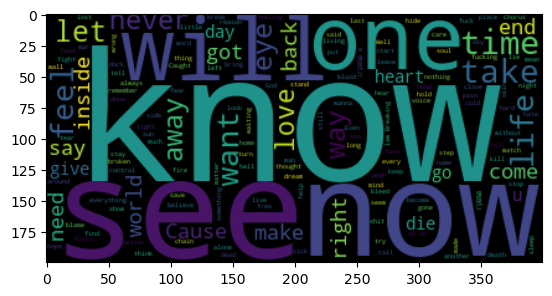

In [75]:
plt.imshow(wc_plot, interpolation='bilinear')

In [77]:
nb = MultinomialNB()

In [80]:
nb.fit(tfidf_result, songs_with_lyrics.genre)

MultinomialNB()

In [82]:
nb.score(tfidf_result, songs_with_lyrics.genre)

0.6876513317191283

In [84]:
songs_with_lyrics.columns

Index(['key_0', 'key_1', 'genre', 'artist_name', 'track_name', 'track_id',
       'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'Artist', 'Album',
       'Song', 'Lyric', 'SongNum', 'Year'],
      dtype='object')

In [86]:
features = songs_with_lyrics[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

In [88]:
features = pd.get_dummies(features)

In [91]:
pca = PCA(n_components=5)

In [92]:
pca.fit_transform(features)

array([[ 4.23109354e+04, -2.14738821e+01, -2.23601596e+01,
        -1.18684969e+00, -7.78117142e-01],
       [ 4.23109354e+04, -2.15070445e+01, -2.53593332e+01,
        -1.23670986e+00, -7.96144152e-01],
       [-1.60000646e+04, -2.55736740e+01, -2.24621570e+01,
        -3.45769668e+00, -8.24445701e-01],
       ...,
       [-3.44760640e+04,  2.97160458e+01, -1.96277384e+00,
         5.33738365e+00, -6.61112289e-01],
       [-3.44760640e+04,  2.97160458e+01, -1.96277384e+00,
         5.33738365e+00, -6.61112289e-01],
       [ 6.63239357e+04, -8.65994259e+00, -7.87847335e+00,
         1.15849444e+00, -6.88282186e-01]])

In [93]:
pca.explained_variance_ratio_

array([9.99999877e-01, 1.11598731e-07, 1.03968961e-08, 8.89737410e-10,
       6.48338592e-11])

In [100]:
svd = TruncatedSVD(n_components=10)
svd.fit_transform(features)

array([[ 3.18587024e+05,  2.03164016e+01, -2.68202409e+01, ...,
        -4.76917548e-02,  5.98549344e-01, -4.77994105e-01],
       [ 3.18587025e+05,  1.94582725e+01, -2.96870027e+01, ...,
        -4.99768679e-02,  5.87299212e-01, -4.85903211e-01],
       [ 2.60276029e+05, -1.79873320e+00, -3.14486927e+01, ...,
        -1.43531785e-02, -1.57049791e-01, -8.16146826e-02],
       ...,
       [ 2.41800050e+05, -5.69523159e+01,  3.08419617e+00, ...,
         1.43696328e-01, -5.93874783e-02, -1.02901397e-01],
       [ 2.41800050e+05, -5.69523159e+01,  3.08419617e+00, ...,
         1.43696328e-01, -5.93874783e-02, -1.02901397e-01],
       [ 3.42600025e+05,  2.30608636e+01, -7.89552312e+00, ...,
        -7.13261639e-01, -4.75006333e-01, -1.55028109e-01]])

In [102]:
svd.explained_variance_ratio_

array([9.99999674e-01, 3.02222171e-07, 2.27902873e-08, 9.30159018e-10,
       6.51667911e-11, 2.14411616e-11, 1.67094085e-11, 1.34298785e-11,
       1.26323018e-11, 1.23955431e-11])

In [106]:
svd = TruncatedSVD(n_components=10)
text_features = svd.fit_transform(tfidf_result)

In [104]:
svd.explained_variance_ratio_

array([0.00243326, 0.0072363 , 0.00686734, 0.00669595, 0.00659731,
       0.00640453, 0.00612488, 0.00609509, 0.00584952, 0.00555836])

In [107]:
svd = TruncatedSVD(n_components=5)
numerical_features = svd.fit_transform(features)

In [108]:
text_features.shape, numerical_features.shape

((826, 10), (826, 5))

In [112]:
all_features = np.hstack((text_features, numerical_features))

ValueError: Negative values in data passed to MultinomialNB (input X)